In [7]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     ---------------------------------------- 48.6/48.6 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------------ --------- 1.0/1.3 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 20.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/210.9 kB ? eta -:--:--
   ---------------------------------------- 210.9/210.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/299.6 kB ? eta -:--:--
   ---------------------------------------- 299.6/299.6 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
dataset = pd.read_csv("dom_d (1).csv")

In [18]:
dataset.describe()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
count,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000
mean,79.242366,80.242492,77.943287,79.158863,8107.575874
std,44.921360,45.530826,44.343205,44.939375,20933.842099
min,15.028815,15.291007,14.710511,14.800243,0.461514
25%,45.500962,45.998962,44.661865,45.498299,907.092200
50%,67.199641,67.999210,66.000154,66.999216,2568.078882
75%,101.000055,102.474696,99.674988,101.000055,7250.700657
max,209.999800,212.000299,205.999834,209.999800,639357.709435


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4542 non-null   object 
 1   Otwarcie    4542 non-null   float64
 2   Najwyzszy   4542 non-null   float64
 3   Najnizszy   4542 non-null   float64
 4   Zamkniecie  4542 non-null   float64
 5   Wolumen     4542 non-null   float64
dtypes: float64(5), object(1)
memory usage: 213.0+ KB


In [20]:
dataset.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2006-10-24,130.499351,139.996526,115.496502,121.501790,639357.709435
1,2006-10-25,128.010900,128.804511,122.498914,127.004758,115231.410376
2,2006-10-26,129.400621,129.400621,120.999771,120.999771,56489.257011
3,2006-10-27,120.999771,122.498914,119.999641,121.501790,51270.121478
4,2006-10-30,123.401947,123.401947,115.996116,118.497793,25887.786637


In [6]:
kolumna_liczbowa = dataset.select_dtypes(include=["float","int"]).columns

for kolumna in kolumna_liczbowa:
    dataset[kolumna]=dataset[kolumna].astype(str).str.replace(",",".").astype(float)

for kolumna in dataset.columns:
    if dataset[kolumna].dtype == "object" :
        dataset[kolumna]=dataset[kolumna].str.replace(",",".").astype("string")

dataset

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2006-10-24,130.499351,139.996526,115.496502,121.501790,639357.709435
1,2006-10-25,128.010900,128.804511,122.498914,127.004758,115231.410376
2,2006-10-26,129.400621,129.400621,120.999771,120.999771,56489.257011
3,2006-10-27,120.999771,122.498914,119.999641,121.501790,51270.121478
4,2006-10-30,123.401947,123.401947,115.996116,118.497793,25887.786637
...,...,...,...,...,...,...
4537,2024-12-16,193.000000,195.600000,191.400000,193.400000,3824.000000
4538,2024-12-17,195.000000,195.200000,184.400000,185.000000,8996.000000
4539,2024-12-18,185.000000,196.400000,185.000000,186.000000,8263.000000
4540,2024-12-19,186.000000,193.800000,186.000000,191.000000,5146.000000


In [21]:
trainset = dataset.iloc[:, 3:4].values
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(trainset)
data_scaled


array([[0.52687724],
       [0.56348363],
       [0.55564659],
       ...,
       [0.89021952],
       [0.8954472 ],
       [0.86930879]])

In [22]:
#split dataset to train and test sets
x_train = []
y_train = []
window = 70

for i in range(window, 3800):
    x_train.append(data_scaled[i-window:i, 0])
    y_train.append(data_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_test = []
y_test = []
for i in range(3801, 4542):
    x_test.append(data_scaled[i-window:i, 0])
    y_test.append(data_scaled[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [24]:
#build LSTM neural network model
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

C:\Users\awilcze2\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
#train model
regressor.fit(x_train, y_train,epochs = 10, batch_size = 32)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0105
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0019
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0015
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0013
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0013
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0015
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0013
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0010
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0011
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 9.4403e-04


In [26]:
#generate prices for test data
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[115.182304],
       [116.059906],
       [116.895485],
       [117.663574],
       [118.33378 ],
       [118.88128 ],
       [119.28374 ],
       [119.51219 ],
       [119.53719 ],
       [119.30883 ],
       [118.81453 ],
       [118.093346],
       [117.232254],
       [116.30004 ],
       [115.38514 ],
       [114.56313 ],
       [113.888336],
       [113.38987 ],
       [113.06351 ],
       [112.88705 ],
       [112.80852 ],
       [112.753716],
       [112.66445 ],
       [112.49977 ],
       [112.220566],
       [111.817085],
       [111.30207 ],
       [110.63851 ],
       [109.81112 ],
       [108.8437  ],
       [107.771095],
       [106.63982 ],
       [105.40101 ],
       [104.074326],
       [102.720474],
       [101.45128 ],
       [100.36942 ],
       [ 99.5497  ],
       [ 99.020386],
       [ 98.72968 ],
       [ 98.59875 ],
       [ 98.54961 ],
       [ 98.54082 ],
       [ 98.55415 ],
       [ 98.58236 ],
       [ 98.617256],
       [ 98.65667 ],
       [ 98.7

In [27]:
#get real price for comparison
real_price =  scaler.inverse_transform(y_test.reshape(-1, 1))
real_price

array([[116.99989649],
       [119.60037698],
       [120.20050849],
       [118.40065038],
       [118.0003392 ],
       [116.99989649],
       [115.00048627],
       [113.1995553 ],
       [108.99984167],
       [109.40001876],
       [110.59987946],
       [112.5995579 ],
       [110.40005913],
       [113.1995553 ],
       [113.40031438],
       [113.7994186 ],
       [114.00017768],
       [113.1995553 ],
       [113.1995553 ],
       [111.20001097],
       [108.99984167],
       [108.99984167],
       [108.19988984],
       [106.00012286],
       [106.40003173],
       [106.20007729],
       [100.00001469],
       [100.39992356],
       [101.1998754 ],
       [100.00001469],
       [100.00001469],
       [ 90.49996636],
       [ 95.99998728],
       [ 97.00002766],
       [101.00005507],
       [101.39996394],
       [102.20004988],
       [101.80000691],
       [ 97.90002377],
       [ 97.39993653],
       [ 97.00002766],
       [ 98.69997561],
       [ 98.99997431],
       [ 98

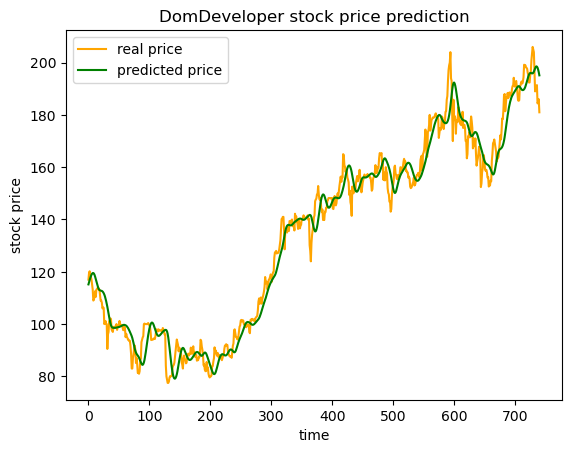

In [28]:
#plot predicted and real price
plt.plot(real_price, color = 'orange', label = 'real price')
plt.plot(predicted_price, color = 'green', label = 'predicted price')
plt.title('DomDeveloper stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [29]:
#metrics
print(f'RMSE {metrics.mean_squared_error(predicted_price, real_price, squared=False)}')
print(f'MAE {metrics.mean_absolute_error(predicted_price, real_price)}')

RMSE 6.091537239588471
MAE 4.631189128511462


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
